In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df2 = pd.read_csv("/content/drive/MyDrive/cerebral_stroke.csv")
df2

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,30669,Male,3.0,0,0,No,children,Rural,95.12,18.0,NaN,0
1,30468,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0
2,16523,Female,8.0,0,0,No,Private,Urban,110.89,17.6,NaN,0
3,56543,Female,70.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0
4,46136,Male,14.0,0,0,No,Never_worked,Rural,161.28,19.1,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...
43395,56196,Female,10.0,0,0,No,children,Urban,58.64,20.4,never smoked,0
43396,5450,Female,56.0,0,0,Yes,Govt_job,Urban,213.61,55.4,formerly smoked,0
43397,28375,Female,82.0,1,0,Yes,Private,Urban,91.94,28.9,formerly smoked,0
43398,27973,Male,40.0,0,0,Yes,Private,Urban,99.16,33.2,never smoked,0


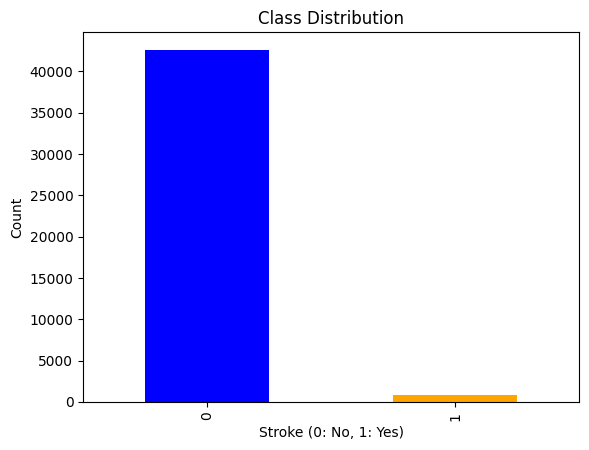

In [ ]:
# Assuming your dataset is loaded in a DataFrame named 'df'
class_counts = df2['stroke'].value_counts()
class_counts.plot(kind='bar', color=['blue', 'orange'], title='Class Distribution')
plt.xlabel('Stroke (0: No, 1: Yes)')
plt.ylabel('Count')
plt.show()


# DATA_CLEANING

In [ ]:
df2.isnull().sum()

,0
id,0
gender,0
age,0
hypertension,0
heart_disease,0
ever_married,0
work_type,0
Residence_type,0
avg_glucose_level,0
bmi,1462


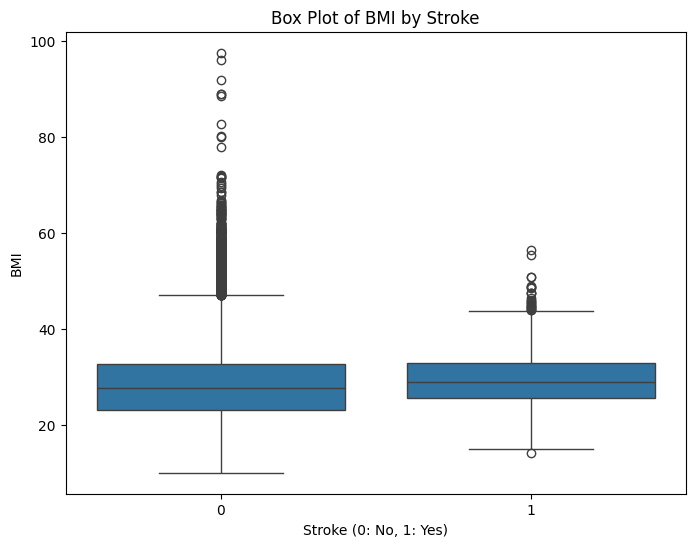

In [ ]:

# Box plot for BMI
plt.figure(figsize=(8, 6))
sns.boxplot(data = df2, x='stroke', y='bmi')
plt.title('Box Plot of BMI by Stroke')
plt.xlabel('Stroke (0: No, 1: Yes)')
plt.ylabel('BMI')
plt.show()

In [ ]:
df2['bmi'].fillna(df2['bmi'].median(), inplace=True)
df2.loc[(df2['age'] <= 20) & (df2['smoking_status'].isna()), 'smoking_status'] = 'never smoked'
df2.loc[(df2['age'] >= 60) & (df2['smoking_status'].isna()), 'smoking_status'] = 'formerly smoked'
df2.isnull().sum()


,0
id,0
gender,0
age,0
hypertension,0
heart_disease,0
ever_married,0
work_type,0
Residence_type,0
avg_glucose_level,0
bmi,0


In [ ]:
df2['smoking_status'].value_counts()

,count
smoking_status,
never smoked,22621
formerly smoked,9632
smokes,6562


In [ ]:
from collections import Counter
Counter(df2['stroke'])

Counter({0: 42617, 1: 783})

In [ ]:
df_null=df2[df2['smoking_status'].isna()]
print(Counter(df_null['stroke']))

Counter({0: 4548, 1: 37})


In [ ]:
df2.dropna(inplace=True)
print(df2.shape)
Counter(df2['stroke'])

(38815, 12)


Counter({0: 38069, 1: 746})

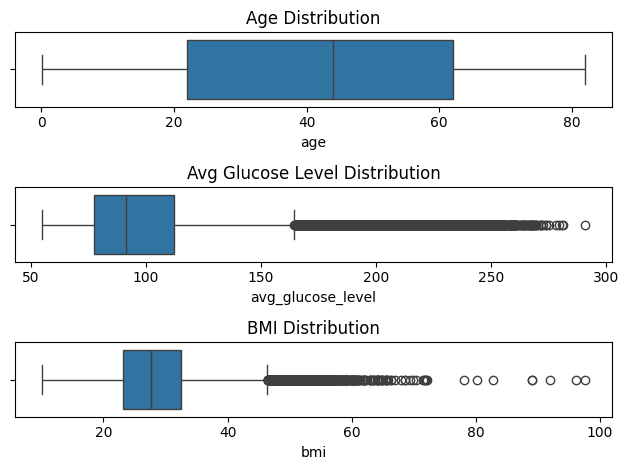

In [ ]:
plt.subplot(311)
sns.boxplot(x=df2['age'])
plt.title('Age Distribution')
plt.subplot(312)
sns.boxplot(x=df2['avg_glucose_level'])
plt.title('Avg Glucose Level Distribution')
plt.subplot(313)
sns.boxplot(x=df2['bmi'])
plt.title('BMI Distribution')
plt.tight_layout()
plt.show()

In [ ]:
df2.isnull().sum()

,0
id,0
gender,0
age,0
hypertension,0
heart_disease,0
ever_married,0
work_type,0
Residence_type,0
avg_glucose_level,0
bmi,0


In [ ]:
df2.drop('id',axis=1,inplace=True)

In [ ]:
df2

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,3.0,0,0,No,children,Rural,95.12,18.0,never smoked,0
1,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0
2,Female,8.0,0,0,No,Private,Urban,110.89,17.6,never smoked,0
3,Female,70.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0
4,Male,14.0,0,0,No,Never_worked,Rural,161.28,19.1,never smoked,0
...,...,...,...,...,...,...,...,...,...,...,...
43395,Female,10.0,0,0,No,children,Urban,58.64,20.4,never smoked,0
43396,Female,56.0,0,0,Yes,Govt_job,Urban,213.61,55.4,formerly smoked,0
43397,Female,82.0,1,0,Yes,Private,Urban,91.94,28.9,formerly smoked,0
43398,Male,40.0,0,0,Yes,Private,Urban,99.16,33.2,never smoked,0


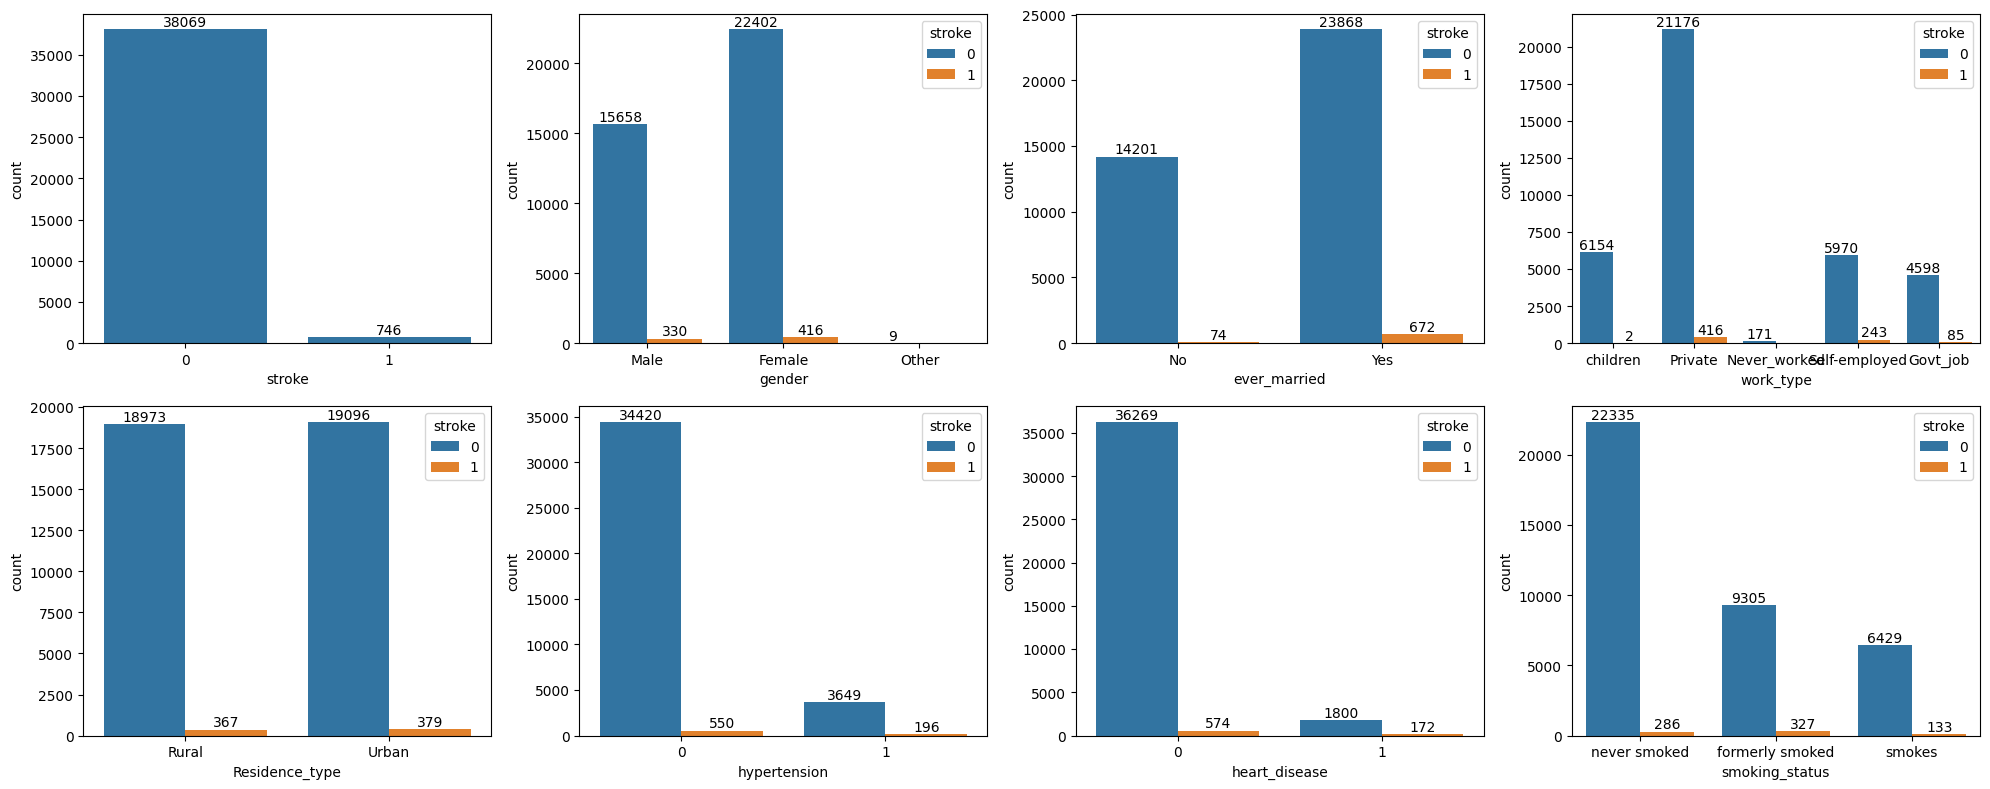

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20,8))

plt.subplot(241)
ax =sns.countplot(x ='stroke', data = df2)
for container in ax.containers:
    ax.bar_label(container)

plt.subplot(242)
ax =sns.countplot(x ='gender', hue = "stroke", data = df2)
for container in ax.containers:
    ax.bar_label(container)

plt.subplot(243)
ax=sns.countplot(x ='ever_married', hue = "stroke", data = df2)
for container in ax.containers:
    ax.bar_label(container)


plt.subplot(244)
ax=sns.countplot(x ='work_type', hue = "stroke", data = df2)
for container in ax.containers:
    ax.bar_label(container)

plt.subplot(245)
ax =sns.countplot(x ='Residence_type', hue = "stroke", data = df2)
for container in ax.containers:
    ax.bar_label(container)



plt.subplot(246)
ax=sns.countplot(x ='hypertension', hue = "stroke", data = df2)
for container in ax.containers:
    ax.bar_label(container)

plt.subplot(247)
ax =sns.countplot(x ='heart_disease', hue = "stroke", data = df2)
for container in ax.containers:
    ax.bar_label(container)

plt.subplot(248)
ax=sns.countplot(x ='smoking_status', hue = "stroke", data = df2)
for container in ax.containers:
    ax.bar_label(container)

plt.tight_layout()



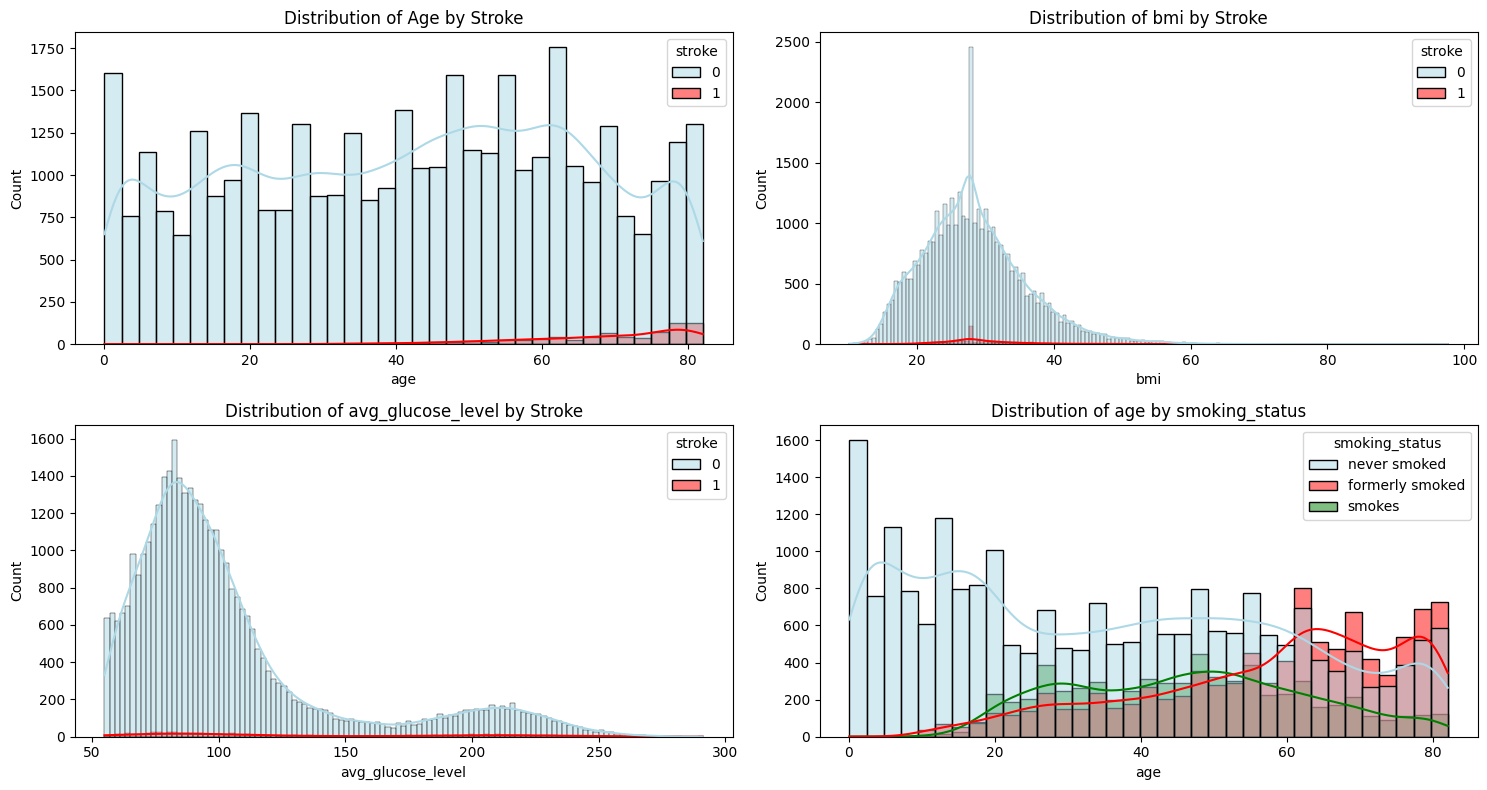

In [ ]:
plt.figure(figsize=(15,8))
plt.subplot(221)
sns.histplot(x='age', data=df2, kde=True,hue='stroke',palette =['lightblue','red'])
plt.title('Distribution of Age by Stroke')


plt.subplot(222)
sns.histplot(x='bmi', data=df2, kde=True,hue='stroke',palette =['lightblue','red'])
plt.title('Distribution of bmi by Stroke')

plt.subplot(223)
sns.histplot(x='avg_glucose_level', data=df2, kde=True,hue='stroke',palette =['lightblue','red'])
plt.title('Distribution of avg_glucose_level by Stroke')

plt.subplot(224)
sns.histplot(x='age', data=df2, kde=True,hue='smoking_status',palette =['lightblue','red','green'])
plt.title('Distribution of age by smoking_status')

plt.tight_layout()

In [ ]:
from imblearn.over_sampling import SMOTENC
smt = SMOTENC
cat_cols = ['ever_married', 'Residence_type','work_type','gender','smoking_status','hypertension','heart_disease']
smote_nc = smt(categorical_features=cat_cols, sampling_strategy='minority',k_neighbors=5,random_state=42)
y= df2['stroke']
X= df2.drop(['stroke'],axis=1)
X_sampled, y_sampled = smote_nc.fit_resample(X, y)
df_sampled = pd.concat([X_sampled, y_sampled], axis=1)
df_sampled


,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,3.000000,0,0,No,children,Rural,95.120000,18.000000,never smoked,0
1,Male,58.000000,1,0,Yes,Private,Urban,87.960000,39.200000,never smoked,0
2,Female,8.000000,0,0,No,Private,Urban,110.890000,17.600000,never smoked,0
3,Female,70.000000,0,0,Yes,Private,Rural,69.040000,35.900000,formerly smoked,0
4,Male,14.000000,0,0,No,Never_worked,Rural,161.280000,19.100000,never smoked,0
...,...,...,...,...,...,...,...,...,...,...,...
76133,Female,81.000000,1,0,Yes,Private,Rural,80.019039,29.585023,never smoked,1
76134,Female,66.124675,0,0,Yes,Govt_job,Rural,198.532103,26.976887,smokes,1
76135,Female,74.876138,0,0,Yes,Private,Rural,178.829191,30.575126,formerly smoked,1
76136,Female,65.813507,0,0,Yes,Private,Rural,184.966888,29.966961,never smoked,1


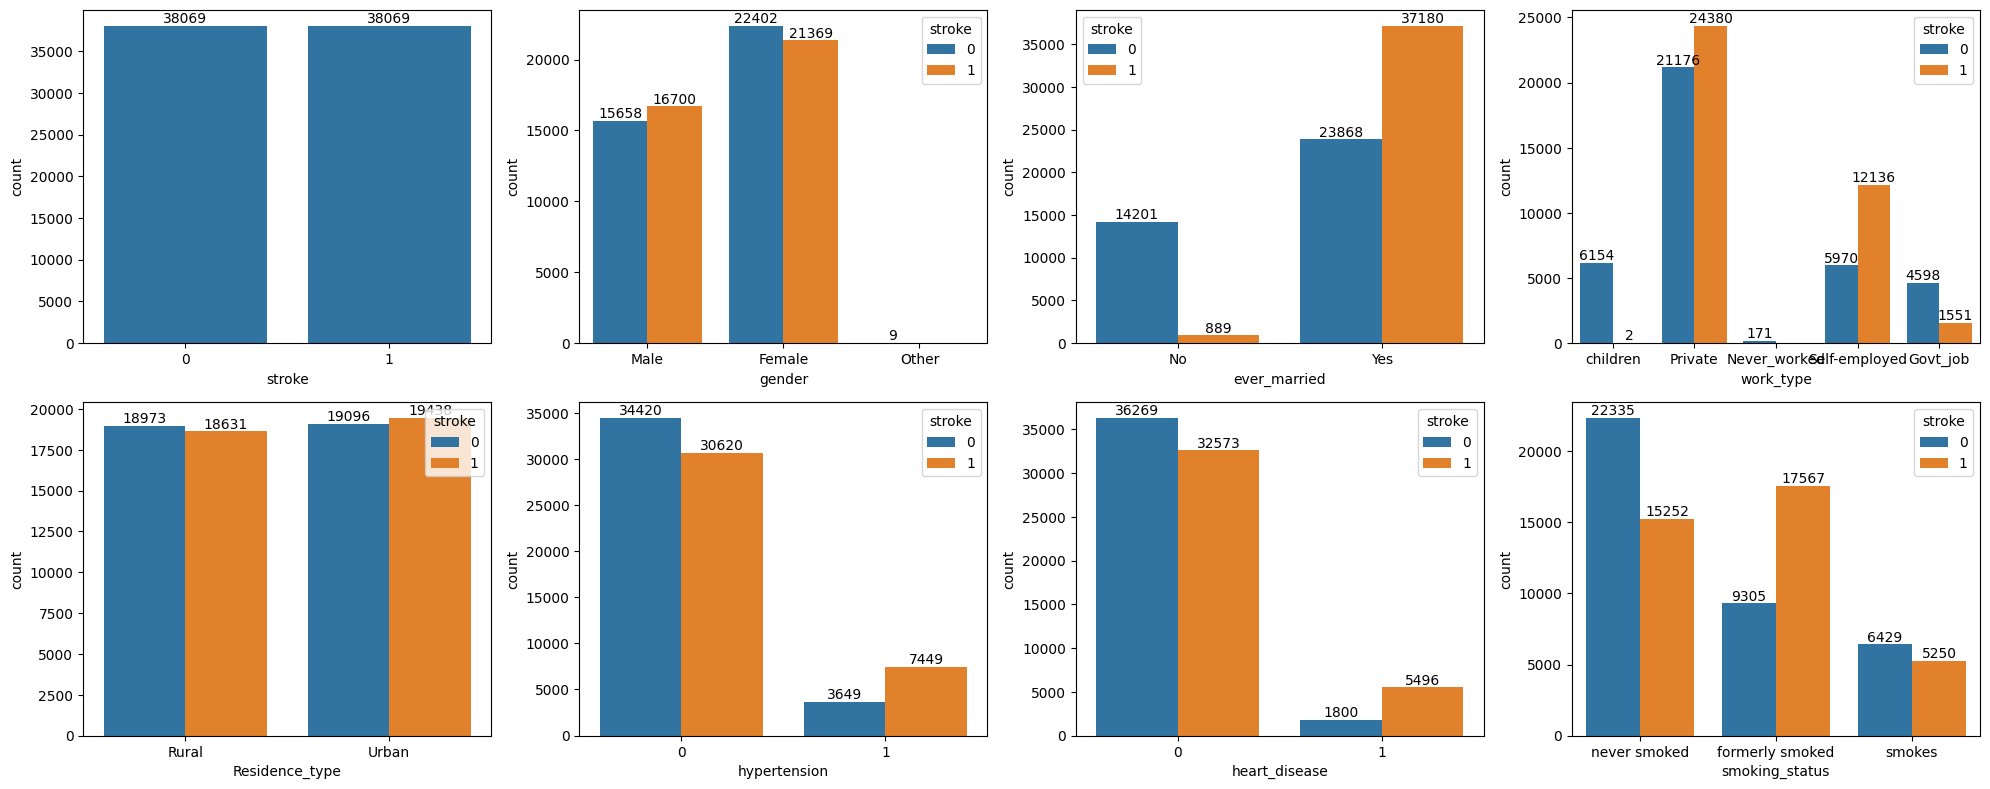

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20,8))

plt.subplot(241)
ax =sns.countplot(x ='stroke', data = df_sampled)
for container in ax.containers:
    ax.bar_label(container)

plt.subplot(242)
ax =sns.countplot(x ='gender', hue = "stroke", data = df_sampled)
for container in ax.containers:
    ax.bar_label(container)

plt.subplot(243)
ax=sns.countplot(x ='ever_married', hue = "stroke", data = df_sampled)
for container in ax.containers:
    ax.bar_label(container)


plt.subplot(244)
ax=sns.countplot(x ='work_type', hue = "stroke", data = df_sampled)
for container in ax.containers:
    ax.bar_label(container)

plt.subplot(245)
ax =sns.countplot(x ='Residence_type', hue = "stroke", data = df_sampled)
for container in ax.containers:
    ax.bar_label(container)



plt.subplot(246)
ax=sns.countplot(x ='hypertension', hue = "stroke", data = df_sampled)
for container in ax.containers:
    ax.bar_label(container)

plt.subplot(247)
ax =sns.countplot(x ='heart_disease', hue = "stroke", data = df_sampled)
for container in ax.containers:
    ax.bar_label(container)

plt.subplot(248)
ax=sns.countplot(x ='smoking_status', hue = "stroke", data = df_sampled)
for container in ax.containers:
    ax.bar_label(container)

plt.tight_layout()



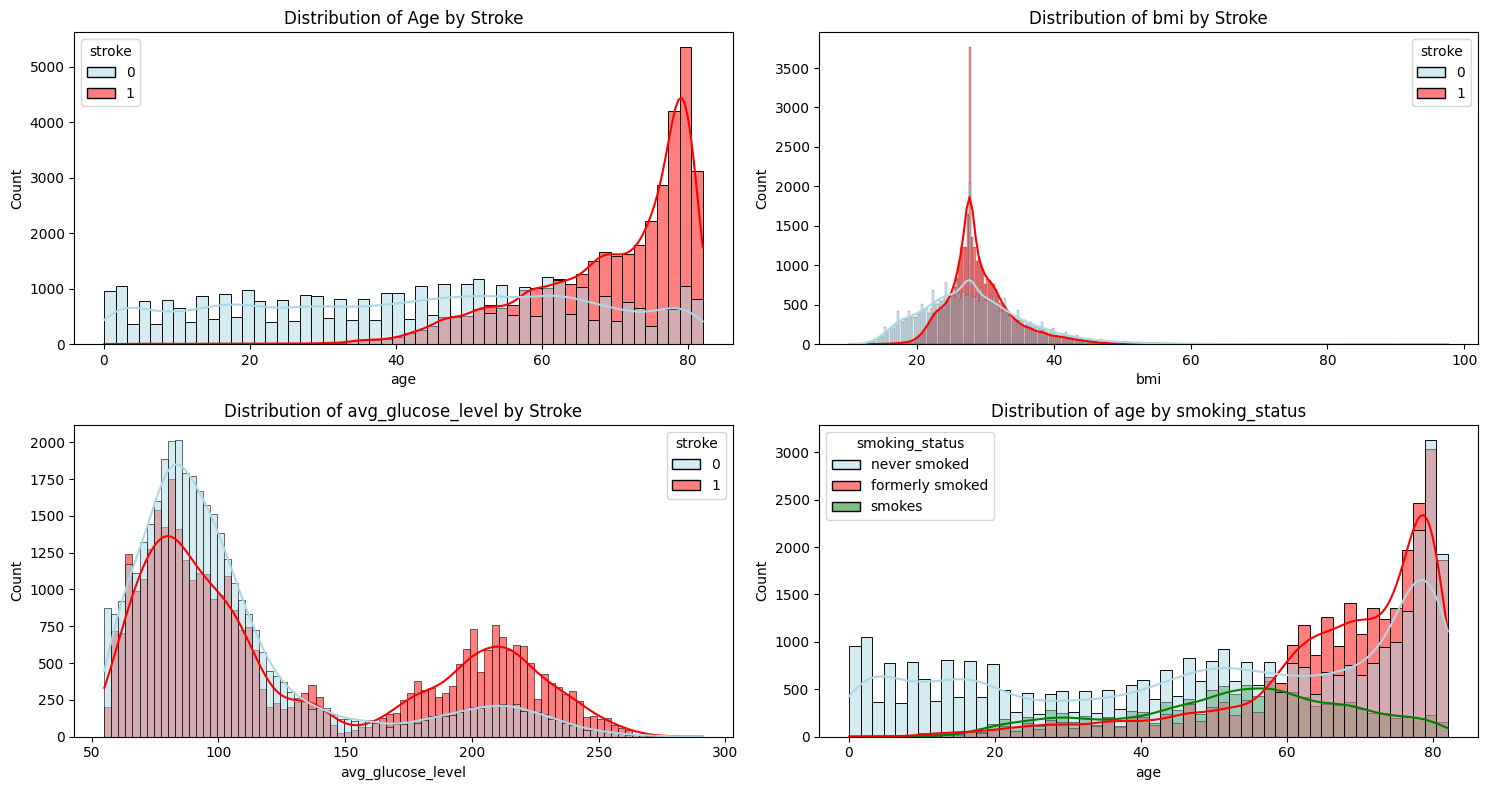

In [ ]:
plt.figure(figsize=(15,8))
plt.subplot(221)
sns.histplot(x='age', data=df_sampled, kde=True,hue='stroke',palette =['lightblue','red'])
plt.title('Distribution of Age by Stroke')


plt.subplot(222)
sns.histplot(x='bmi', data=df_sampled, kde=True,hue='stroke',palette =['lightblue','red'])
plt.title('Distribution of bmi by Stroke')

plt.subplot(223)
sns.histplot(x='avg_glucose_level', data=df_sampled, kde=True,hue='stroke',palette =['lightblue','red'])
plt.title('Distribution of avg_glucose_level by Stroke')

plt.subplot(224)
sns.histplot(x='age', data=df_sampled, kde=True,hue='smoking_status',palette =['lightblue','red','green'])
plt.title('Distribution of age by smoking_status')

plt.tight_layout()

In [ ]:
y= df2['stroke']
X= df2.drop(['stroke'],axis=1)

# scaling


In [ ]:

cols = ['ever_married', 'Residence_type','work_type',
        'gender','smoking_status','hypertension','heart_disease']

le = LabelEncoder()
for col in cols:
    X[col] = le.fit_transform(X[col])


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Models

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score ,f1_score ,roc_auc_score,accuracy_score,roc_curve
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTENC
from imblearn.under_sampling import EditedNearestNeighbours
import warnings

knn = KNeighborsClassifier()
nb = GaussianNB()
dt = DecisionTreeClassifier()
rf = RandomForestClassifier()
lr = LogisticRegression()
sv=SVC()

models = [knn, nb, dt, rf,lr,sv]

In [ ]:
def evaluate_models(models, X_train, y_train, X_test, y_test):
    # Ignore all warnings
    warnings.filterwarnings('ignore')

    # Initialize a dictionary to store the results
    d = {}

    # Iterate over each model in the provided list
    for model in models:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        # Compute performance metrics
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred, average=None)  # Precision for each class
        recall = recall_score(y_test, y_pred, average=None)  # Recall for each class
        f1 = f1_score(y_test, y_pred, average=None)  # F1 score for each class

        # Check if model supports predict_proba for ROC AUC score calculation
        if hasattr(model, "predict_proba"):
            try:
                # For classifiers supporting predict_proba, calculate ROC AUC score
                roc_auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])
            except:
                # If predict_proba fails, set roc_auc to None
                roc_auc = None
        else:
            # If model doesn't support predict_proba, set roc_auc to None
            roc_auc = None

        # Store the metrics in the dictionary
        model_name = str(model)[:len(str(model))-2]
        print("MODEL NAME:",model)
        print(classification_report(y_test, y_pred))
        d[model_name] = {
            'accuracy': accuracy,  # Accuracy score
            'precision_class_0': precision[0],  # Precision for class 0
            'precision_class_1': precision[1],  # Precision for class 1
            'recall_class_0': recall[0],  # Recall for class 0
            'recall_class_1': recall[1],  # Recall for class 1
            'f1_class_0': f1[0],  # F1 score for class 0
            'f1_class_1': f1[1],  # F1 score for class 1
            'roc_auc': roc_auc  # ROC AUC score (if available)
        }

    # Convert the dictionary to a DataFrame and transpose it
    df_results = pd.DataFrame(d).T

    # Add 'models' column to the DataFrame
    df_results['models'] = df_results.index

    # Reorder the columns to move 'models' to the first position
    df_results = df_results[['models'] + [col for col in df_results.columns if col != 'models']]

    # Reset the index of the DataFrame
    df_results.reset_index(drop=True, inplace=True)
    return df_results


In [ ]:
def plot_roc_curves(models, X_train, y_train, X_test, y_test):
    # Ignore all warnings
    warnings.filterwarnings('ignore')

    # Initialize lists to store results
    roc_curves = []
    auc_scores = []
    model_names = []

    # Iterate over each model
    for model in models:
        # For SVC, ensure it has probability=True to calculate probabilities
        if hasattr(model, 'predict_proba') == False:
            # Check if model has predict_proba, if not, skip ROC calculation
            print(f"Model {model.__class__.__name__} does not support predict_proba, skipping ROC curve.")
            continue

        # Fit the model
        model.fit(X_train, y_train)

        # Get predicted probabilities for the positive class (class 1)
        y_proba = model.predict_proba(X_test)[:, 1]

        # Compute AUC
        auc = roc_auc_score(y_test, y_proba)
        auc_scores.append(auc)
        model_names.append(model.__class__.__name__)

        # Compute ROC curve
        fpr, tpr, _ = roc_curve(y_test, y_proba)
        roc_curves.append((fpr, tpr))

    # Check if there are models to plot
    if len(roc_curves) == 0:
        print("No models with 'predict_proba' were found. Cannot plot ROC curves.")
        return

    # Plot combined ROC curve for all models
    plt.figure(figsize=(10, 8))
    for i, (fpr, tpr) in enumerate(roc_curves):
        plt.plot(fpr, tpr, label=f"{model_names[i]} (AUC = {auc_scores[i]:.4f})")

    # Plot random guess line (diagonal)
    plt.plot([0, 1], [0, 1], 'k--', label="Random Guess")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("Combined ROC Curve for All Models")
    plt.legend(loc="lower right")
    plt.grid(alpha=0.3)
    plt.show()


In [ ]:
from sklearn.metrics import confusion_matrix
def get_model_predictions(models, X_train, y_train, X_test, y_test):
    # Initialize an empty DataFrame to store predictions
    test_predictions = pd.DataFrame()
    # models = [nb]

    # Iterate over each model
    for model in models:
        # Fit the model on the resampled training data
        model.fit(X_train, y_train)

        # Make predictions on the test data
        y_pred_resampled = model.predict(X_test)

        # Store the predictions in the DataFrame, using the model name as the column name
        test_predictions[str(model)[:len(str(model))-2]] = y_pred_resampled

    # Add the actual values as the 'actual' column
    test_predictions['actual'] = y_test.reset_index(drop=True)

    # Return the DataFrame containing predictions and actual values
    return test_predictions


In [ ]:
def plot_confusion_matrices(test_predictions):
    # Plot confusion matrix for each model
    for model_name in test_predictions.columns[:-1]:  # Exclude the 'actual' column
        y_pred = test_predictions[model_name]
        cm = confusion_matrix(test_predictions['actual'], y_pred)

        plt.figure(figsize=(6, 5))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                    xticklabels=['Class 0', 'Class 1'],
                    yticklabels=['Class 0', 'Class 1'])
        plt.title(f'Confusion Matrix for {model_name}')
        plt.xlabel('Predicted')
        plt.ylabel('Actual')
        plt.show()

# WITHOUT SAMPLING PREDICTION


In [ ]:
y= df2['stroke'].reset_index(drop=True)
X= df2.drop(['stroke'],axis=1).reset_index(drop=True)

cols = ['ever_married', 'Residence_type','work_type',
        'gender','smoking_status','hypertension','heart_disease']

le = LabelEncoder()
for col in cols:
    X[col] = le.fit_transform(X[col])

num_cols = ['age','avg_glucose_level','bmi']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X[num_cols])


df_num = pd.DataFrame(X_scaled,columns=num_cols)


X = pd.concat([X[cols],df_num],axis=1)


In [ ]:
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.3,random_state=42)
evaluate_models(models, X_train, y_train, X_test, y_test)

MODEL NAME: KNeighborsClassifier()
              precision    recall  f1-score   support

           0       0.98      1.00      0.99     11437
           1       0.14      0.00      0.01       208

    accuracy                           0.98     11645
   macro avg       0.56      0.50      0.50     11645
weighted avg       0.97      0.98      0.97     11645

MODEL NAME: GaussianNB()
              precision    recall  f1-score   support

           0       0.99      0.91      0.95     11437
           1       0.07      0.38      0.12       208

    accuracy                           0.90     11645
   macro avg       0.53      0.65      0.54     11645
weighted avg       0.97      0.90      0.93     11645

MODEL NAME: DecisionTreeClassifier()
              precision    recall  f1-score   support

           0       0.98      0.98      0.98     11437
           1       0.06      0.09      0.07       208

    accuracy                           0.96     11645
   macro avg       0.52      0.

,models,accuracy,precision_class_0,precision_class_1,recall_class_0,recall_class_1,f1_class_0,f1_class_1,roc_auc
0,KNeighborsClassifier,0.981709,0.982213,0.142857,0.999475,0.004808,0.990769,0.009302,0.602142
1,GaussianNB,0.901417,0.987862,0.072727,0.910816,0.384615,0.947775,0.122324,0.816695
2,DecisionTreeClassifier,0.960069,0.983263,0.061433,0.975955,0.086538,0.979595,0.071856,0.531247
3,RandomForestClassifier,0.982138,0.982221,0.500000,0.999913,0.004808,0.990988,0.009524,0.767542
4,LogisticRegression,0.982138,0.982138,0.000000,1.000000,0.000000,0.990989,0.000000,0.845725
5,SVC,0.982138,0.982138,0.000000,1.000000,0.000000,0.990989,0.000000,NaN


In [ ]:
test_predictions=get_model_predictions(models, X_train, y_train, X_test, y_test)
test_predictions

,KNeighborsClassifier,GaussianNB,DecisionTreeClassifier,RandomForestClassifier,LogisticRegression,SVC,actual
0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...
11640,0,0,0,0,0,0,0
11641,0,1,0,0,0,0,0
11642,0,0,0,0,0,0,0
11643,0,0,0,0,0,0,0


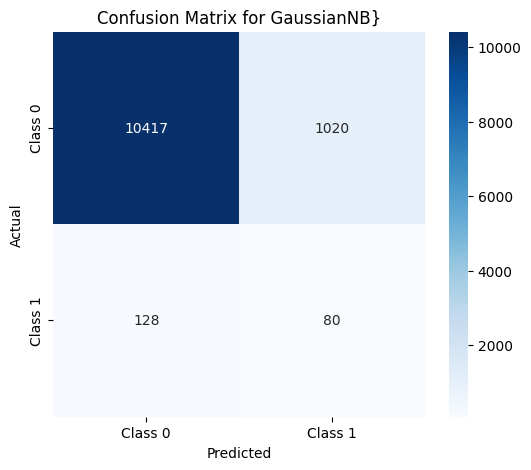

In [ ]:
y_pred = test_predictions['GaussianNB']
cm = confusion_matrix(test_predictions['actual'], y_pred)

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Class 0', 'Class 1'],
            yticklabels=['Class 0', 'Class 1'])
plt.title('Confusion Matrix for GaussianNB}')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

###SMOTE-NC PREDICTION

In [ ]:
def smote_nc_sampling(smt,df,k=5):
    y= df['stroke']
    X= df.drop(['stroke'],axis=1)

    X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.3,random_state=42)

    cat_cols = ['ever_married', 'Residence_type','work_type','gender','smoking_status','hypertension','heart_disease']
    smote_nc = smt(categorical_features=cat_cols, sampling_strategy='minority',k_neighbors=k,random_state=42)


    X_train_resampled, y_train_resampled = smote_nc.fit_resample(X_train, y_train)
    X_test_resampled, y_test_resampled = smote_nc.fit_resample(X_test, y_test)


    le = LabelEncoder()
    for col in cat_cols:
        X_train_resampled[col] = le.fit_transform(X_train_resampled[col])
        X_test_resampled[col] = le.fit_transform(X_test_resampled[col])

    num_cols = ['age','avg_glucose_level','bmi']
    scaler = StandardScaler()
    train_X_scaled = scaler.fit_transform(X_train_resampled[num_cols])
    test_X_scaled = scaler.fit_transform(X_test_resampled[num_cols])

    df_num_train = pd.DataFrame(train_X_scaled,columns=num_cols)
    df_num_test = pd.DataFrame(test_X_scaled,columns=num_cols)

    X_train_scaled = pd.concat([X_train_resampled[cat_cols],df_num_train],axis=1)
    X_test_scaled = pd.concat([X_test_resampled[cat_cols],df_num_test],axis=1)

    return X_train_scaled,X_test_scaled,y_train_resampled,y_test_resampled


In [ ]:
X_train_scaled,X_test_scaled,y_train_resampled,y_test_resampled = smote_nc_sampling(SMOTENC,df2)

In [ ]:
evaluate_models(models,X_train_scaled,y_train_resampled,X_test_scaled,y_test_resampled)

MODEL NAME: KNeighborsClassifier()
              precision    recall  f1-score   support

           0       0.57      0.87      0.69     11437
           1       0.73      0.35      0.48     11437

    accuracy                           0.61     22874
   macro avg       0.65      0.61      0.58     22874
weighted avg       0.65      0.61      0.58     22874

MODEL NAME: GaussianNB()
              precision    recall  f1-score   support

           0       0.91      0.66      0.76     11437
           1       0.73      0.93      0.82     11437

    accuracy                           0.80     22874
   macro avg       0.82      0.80      0.79     22874
weighted avg       0.82      0.80      0.79     22874

MODEL NAME: DecisionTreeClassifier()
              precision    recall  f1-score   support

           0       0.70      0.76      0.73     11437
           1       0.74      0.68      0.71     11437

    accuracy                           0.72     22874
   macro avg       0.72      0.

,models,accuracy,precision_class_0,precision_class_1,recall_class_0,recall_class_1,f1_class_0,f1_class_1,roc_auc
0,KNeighborsClassifier,0.610825,0.573152,0.728502,0.868322,0.353327,0.690516,0.475860,0.675843
1,GaussianNB,0.795751,0.905721,0.732682,0.660226,0.931276,0.763730,0.820128,0.837186
2,DecisionTreeClassifier,0.718851,0.703397,0.736847,0.756842,0.680860,0.729141,0.707748,0.718851
3,RandomForestClassifier,0.620093,0.575248,0.797230,0.918073,0.322112,0.707309,0.458837,0.826124
4,LogisticRegression,0.780012,0.814804,0.752146,0.724753,0.835271,0.767145,0.791532,0.857648
5,SVC,0.787532,0.806163,0.771038,0.757104,0.817959,0.780864,0.793806,NaN


Model SVC does not support predict_proba, skipping ROC curve.


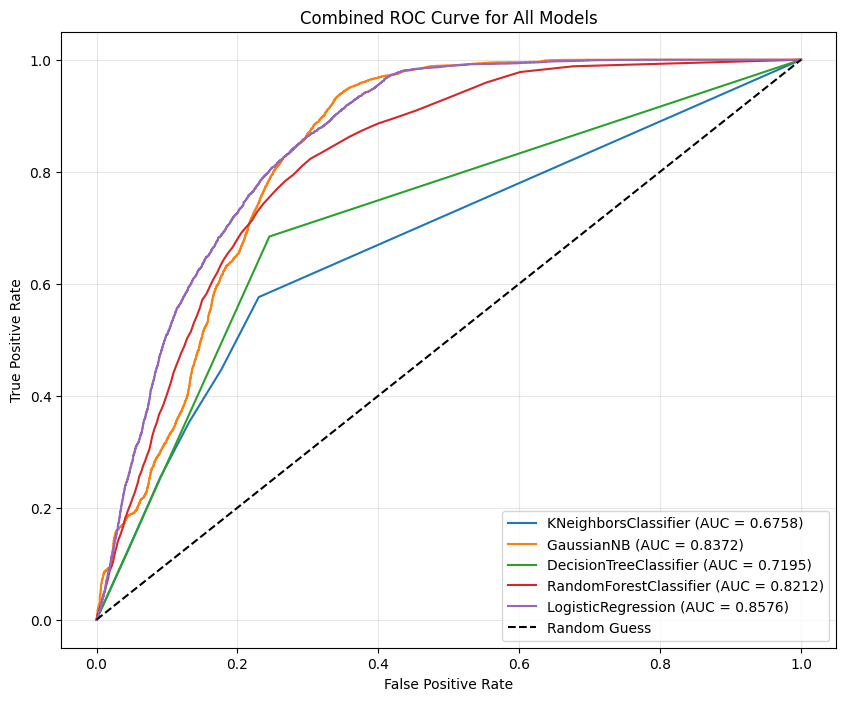

In [ ]:
plot_roc_curves(models,X_train_scaled,y_train_resampled,X_test_scaled,y_test_resampled)

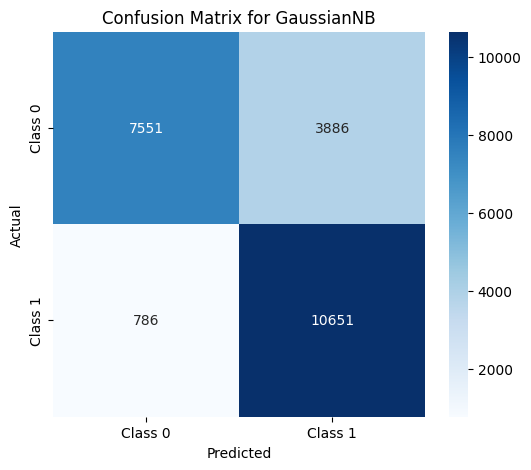

In [ ]:
test_predictionss = get_model_predictions([nb],X_train_scaled,y_train_resampled,X_test_scaled,y_test_resampled)
plot_confusion_matrices(test_predictionss)

#  SMOTE-NC PREDICTION WITH DIFF K-VALUE

In [ ]:
X_train_scaled1,X_test_scaled1,y_train_resampled1,y_test_resampled1 = smote_nc_sampling(SMOTENC,df2,7)

In [ ]:
evaluate_models(models,X_train_scaled1,y_train_resampled1,X_test_scaled1,y_test_resampled1)

MODEL NAME: KNeighborsClassifier()
              precision    recall  f1-score   support

           0       0.61      0.86      0.72     11437
           1       0.77      0.45      0.57     11437

    accuracy                           0.66     22874
   macro avg       0.69      0.66      0.64     22874
weighted avg       0.69      0.66      0.64     22874

MODEL NAME: GaussianNB()
              precision    recall  f1-score   support

           0       0.95      0.64      0.77     11437
           1       0.73      0.96      0.83     11437

    accuracy                           0.80     22874
   macro avg       0.84      0.80      0.80     22874
weighted avg       0.84      0.80      0.80     22874

MODEL NAME: DecisionTreeClassifier()
              precision    recall  f1-score   support

           0       0.71      0.80      0.75     11437
           1       0.77      0.67      0.72     11437

    accuracy                           0.74     22874
   macro avg       0.74      0.

,models,accuracy,precision_class_0,precision_class_1,recall_class_0,recall_class_1,f1_class_0,f1_class_1,roc_auc
0,KNeighborsClassifier,0.657209,0.611373,0.767162,0.862989,0.451430,0.715710,0.568393,0.713007
1,GaussianNB,0.803882,0.947816,0.729968,0.643176,0.964589,0.766330,0.831036,0.846466
2,DecisionTreeClassifier,0.735857,0.709906,0.769131,0.797674,0.674040,0.751235,0.718453,0.735857
3,RandomForestClassifier,0.657165,0.604475,0.817075,0.909329,0.405001,0.726206,0.541564,0.841179
4,LogisticRegression,0.794527,0.836816,0.761672,0.731748,0.857305,0.780763,0.806664,0.864987
5,SVC,0.799729,0.823152,0.779472,0.763487,0.835971,0.792198,0.806733,NaN


Model SVC does not support predict_proba, skipping ROC curve.


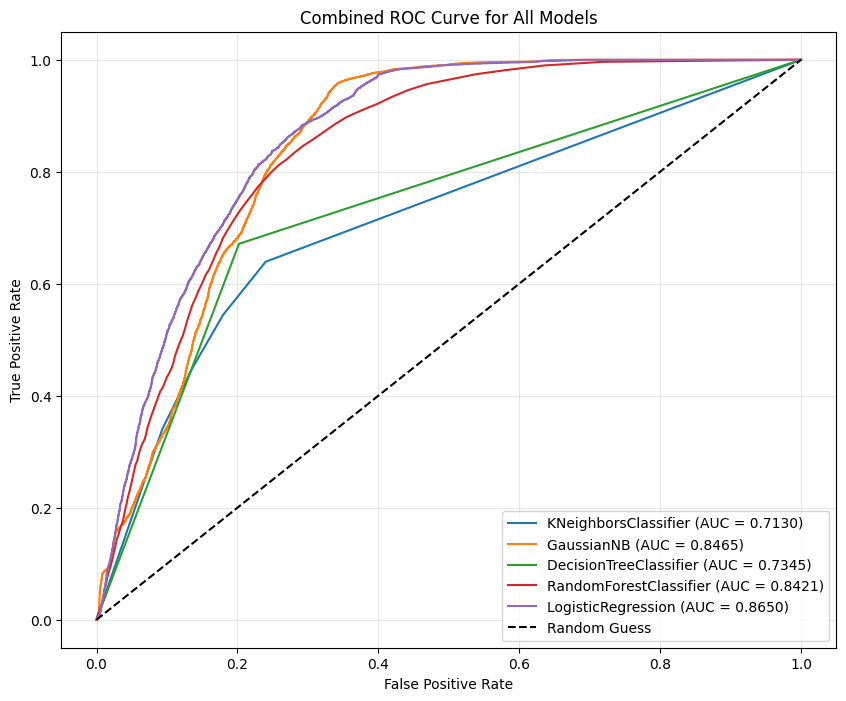

In [ ]:
plot_roc_curves(models,X_train_scaled1,y_train_resampled1,X_test_scaled1,y_test_resampled1)

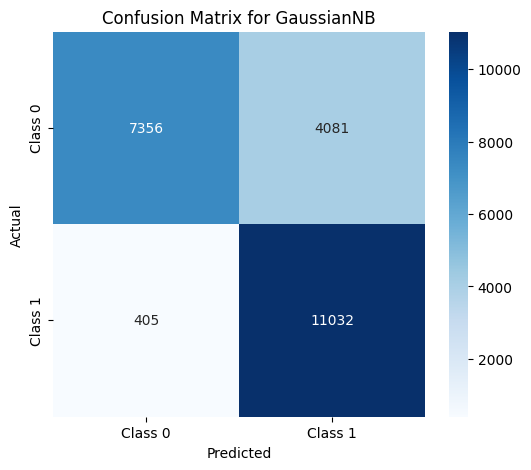

In [ ]:
test_predictions1 = get_model_predictions([nb],X_train_scaled1,y_train_resampled1,X_test_scaled1,y_test_resampled1)
plot_confusion_matrices(test_predictions1)

# SMOTENC + ENN Prediction




In [ ]:
def smote_nc_enn_sampling(smt,df,k=5,n=3):
    y= df['stroke']
    X= df.drop(['stroke'],axis=1)

    X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.3,random_state=42)

    cat_cols = ['ever_married', 'Residence_type','work_type','gender','smoking_status','hypertension','heart_disease']
    smote_nc = smt(categorical_features=cat_cols, sampling_strategy='minority',k_neighbors=k,random_state=42)


    X_train_resampled, y_train_resampled = smote_nc.fit_resample(X_train, y_train)
    X_test_resampled, y_test_resampled = smote_nc.fit_resample(X_test, y_test)


    le = LabelEncoder()
    for col in cat_cols:
        X_train_resampled[col] = le.fit_transform(X_train_resampled[col])
        X_test_resampled[col] = le.fit_transform(X_test_resampled[col])

    enn = EditedNearestNeighbours(n_neighbors=n,sampling_strategy = 'all')
    X_train_resampled_enn, y_train_resampled_enn = enn.fit_resample(X_train_resampled, y_train_resampled)
    X_test_resampled_enn, y_test_resampled_enn = enn.fit_resample(X_test_resampled, y_test_resampled)

    num_cols = ['age','avg_glucose_level','bmi']
    scaler = StandardScaler()
    train_X_scaled = scaler.fit_transform(X_train_resampled_enn[num_cols])
    test_X_scaled = scaler.fit_transform(X_test_resampled_enn[num_cols])

    df_num_train = pd.DataFrame(train_X_scaled,columns=num_cols)
    df_num_test = pd.DataFrame(test_X_scaled,columns=num_cols)

    X_train_scaled = pd.concat([X_train_resampled_enn[cat_cols],df_num_train],axis=1)
    X_test_scaled = pd.concat([X_test_resampled_enn[cat_cols],df_num_test],axis=1)

    return X_train_scaled,X_test_scaled,y_train_resampled_enn,y_test_resampled_enn

In [ ]:
X_train_scaled,X_test_scaled,y_train_resampled,y_test_resampled = smote_nc_enn_sampling(SMOTENC,df2)

In [ ]:
evaluate_models(models,X_train_scaled,y_train_resampled,X_test_scaled,y_test_resampled)

MODEL NAME: KNeighborsClassifier()
              precision    recall  f1-score   support

           0       0.64      0.88      0.74      8897
           1       0.86      0.59      0.70     10846

    accuracy                           0.72     19743
   macro avg       0.75      0.74      0.72     19743
weighted avg       0.76      0.72      0.72     19743

MODEL NAME: GaussianNB()
              precision    recall  f1-score   support

           0       0.90      0.77      0.83      8897
           1       0.83      0.93      0.88     10846

    accuracy                           0.86     19743
   macro avg       0.86      0.85      0.85     19743
weighted avg       0.86      0.86      0.85     19743

MODEL NAME: DecisionTreeClassifier()
              precision    recall  f1-score   support

           0       0.68      0.81      0.74      8897
           1       0.82      0.69      0.75     10846

    accuracy                           0.75     19743
   macro avg       0.75      0.

,models,accuracy,precision_class_0,precision_class_1,recall_class_0,recall_class_1,f1_class_0,f1_class_1,roc_auc
0,KNeighborsClassifier,0.720610,0.636849,0.860622,0.884231,0.586391,0.740424,0.697521,0.786317
1,GaussianNB,0.855088,0.896688,0.829007,0.766775,0.927531,0.826659,0.875506,0.895009
2,DecisionTreeClassifier,0.746037,0.683941,0.817370,0.811397,0.692421,0.742237,0.749725,0.751909
3,RandomForestClassifier,0.768475,0.677878,0.913754,0.926492,0.638853,0.782923,0.751967,0.902522
4,LogisticRegression,0.848098,0.858672,0.840552,0.793526,0.892864,0.824815,0.865919,0.920964
5,SVC,0.852403,0.838443,0.863720,0.832977,0.868339,0.835701,0.866023,NaN


Model SVC does not support predict_proba, skipping ROC curve.


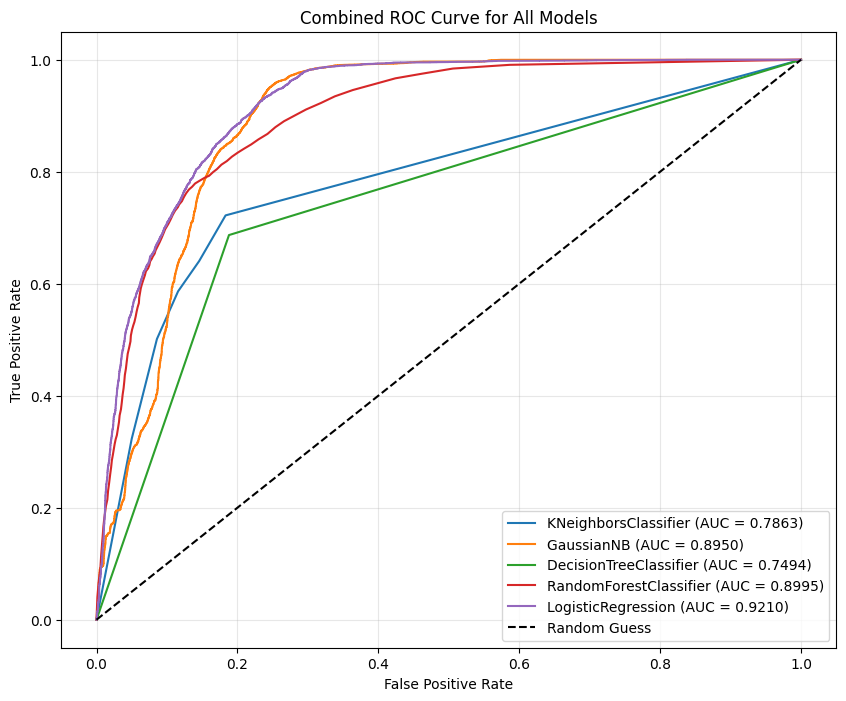

In [ ]:
plot_roc_curves(models,X_train_scaled,y_train_resampled,X_test_scaled,y_test_resampled)

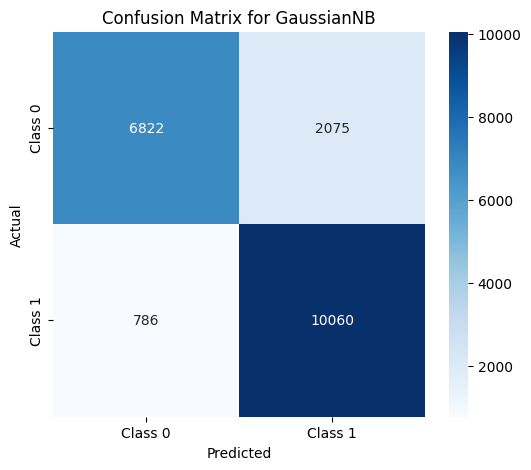

In [ ]:
test_predictions = get_model_predictions([nb],X_train_scaled,y_train_resampled,X_test_scaled,y_test_resampled)
plot_confusion_matrices(test_predictions)


# SMOTE-NC + ENN PREDICTION WITH DIFF K-VALUE

In [ ]:
X_train_scaled,X_test_scaled,y_train_resampled,y_test_resampled = smote_nc_enn_sampling(SMOTENC,df2,7)

In [ ]:
evaluate_models(models,X_train_scaled,y_train_resampled,X_test_scaled,y_test_resampled)

MODEL NAME: KNeighborsClassifier()
              precision    recall  f1-score   support

           0       0.69      0.89      0.78      8600
           1       0.88      0.67      0.76     10445

    accuracy                           0.77     19045
   macro avg       0.79      0.78      0.77     19045
weighted avg       0.80      0.77      0.77     19045

MODEL NAME: GaussianNB()
              precision    recall  f1-score   support

           0       0.95      0.77      0.85      8600
           1       0.84      0.97      0.90     10445

    accuracy                           0.88     19045
   macro avg       0.89      0.87      0.88     19045
weighted avg       0.89      0.88      0.88     19045

MODEL NAME: DecisionTreeClassifier()
              precision    recall  f1-score   support

           0       0.70      0.87      0.78      8600
           1       0.87      0.70      0.77     10445

    accuracy                           0.77     19045
   macro avg       0.78      0.

,models,accuracy,precision_class_0,precision_class_1,recall_class_0,recall_class_1,f1_class_0,f1_class_1,roc_auc
0,KNeighborsClassifier,0.769546,0.689156,0.882613,0.891977,0.668741,0.777558,0.760935,0.825592
1,GaussianNB,0.879863,0.950986,0.838549,0.773837,0.967161,0.853315,0.898275,0.911515
2,DecisionTreeClassifier,0.774324,0.702124,0.865762,0.868837,0.696506,0.776634,0.771965,0.782671
3,RandomForestClassifier,0.799160,0.711714,0.926107,0.933256,0.688751,0.807567,0.789985,0.924575
4,LogisticRegression,0.865582,0.882085,0.853873,0.810698,0.910771,0.844886,0.881405,0.935481
5,SVC,0.873458,0.868540,0.877336,0.848140,0.894303,0.858219,0.885739,NaN


Model SVC does not support predict_proba, skipping ROC curve.


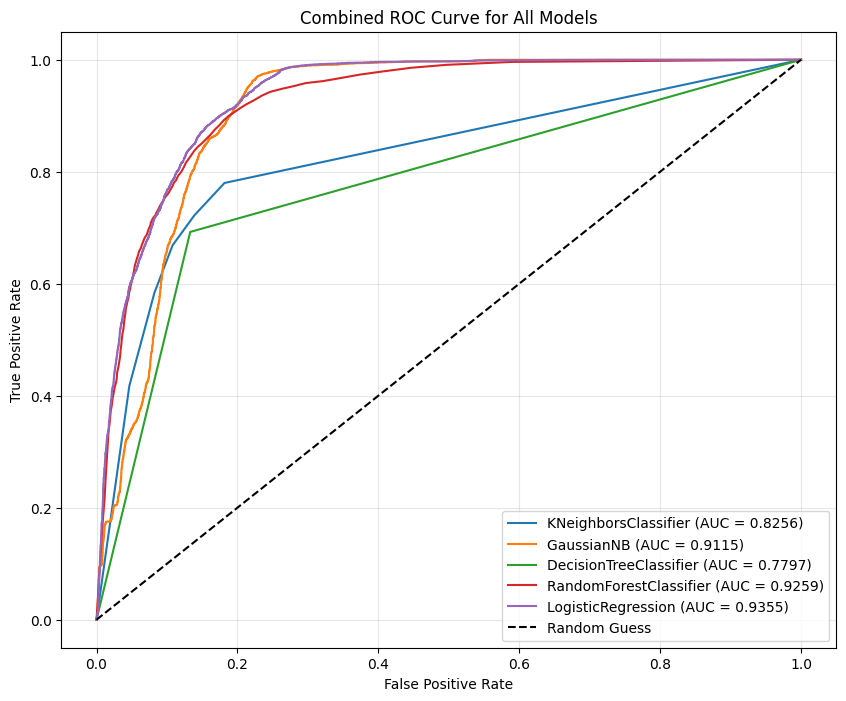

In [ ]:
plot_roc_curves(models,X_train_scaled,y_train_resampled,X_test_scaled,y_test_resampled)

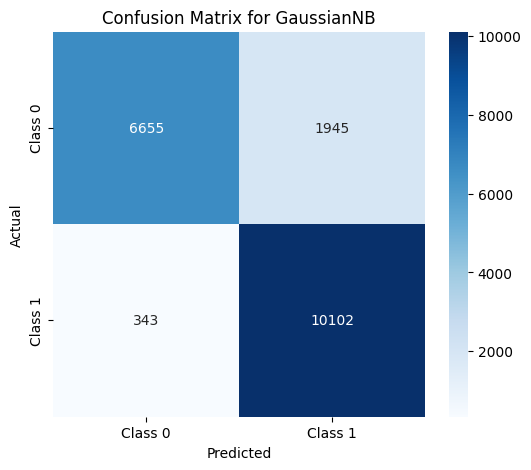

In [ ]:
test_predictions = get_model_predictions([nb],X_train_scaled,y_train_resampled,X_test_scaled,y_test_resampled)
plot_confusion_matrices(test_predictions)